In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Data importing

In [3]:
df = pd.read_csv('./data/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
files = [file for file in os.listdir('./data/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')]

sales_data = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv(f'./data/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/{file}')
    sales_data = pd.concat([sales_data, temp_df])

sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Data Cleaning

In [5]:
sales_data.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [6]:
## To get all the null values in the form of a dataframe
null_df = sales_data[sales_data.isna().any(axis=1)]



In [7]:
sales_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
## To drop the NaN values 
sales_data = sales_data.dropna(how='all')


In [9]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
sales_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [11]:
sales_data.loc[sales_data['Quantity Ordered']== 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
## To remove the 'Quantity Order' column in df
sales_data = sales_data.loc[sales_data['Quantity Ordered']!= 'Quantity Ordered']

sales_data.count()

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
dtype: int64

In [13]:
# Convert Quantity Ordered to Integer

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

sales_data.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


### Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

1. Add one column 'Sales'  = Quantity Ordered * Price Each
2. Add a column to get month from the Ordered Date
3. Groupby data by month
4. Sum od sales for each month
5. Max of sum gives the result

In [14]:
# 1. Add one column 'Sales'  = Quantity Ordered * Price Each
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [16]:
# 2. Add a column to get month from the Ordered Date

sales_data['Month'] = sales_data['Order Date'].str[0:2]
sales_data['Month'] = pd.to_numeric(sales_data['Month'])

sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [122]:
each_month_sales = sales_data.groupby(['Month']).sum()
each_month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


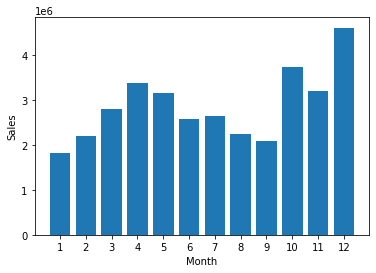

In [44]:
# Data Visualizer

plt.bar(each_month_sales.index , each_month_sales['Sales'])
plt.xticks(each_month_sales.index)
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()


In [51]:
sales_max= each_month_sales['Sales'].max()
sales_month_max = each_month_sales.index[each_month_sales['Sales']== each_month_sales['Sales'].max()][0]
print( f"The sales was maximum in the month of {sales_month_max} with the amount of {sales_max}.")

The sales was maximum in the month of 12 with the amount of 4613443.34.


In [119]:
sales_max= each_month_sales['Sales'].max()
sales_month_max = each_month_sales['Sales'].idxmax()
print( f"The sales was maximum in the month of {sales_month_max} with the amount of {sales_max}.")

The sales was maximum in the month of 12 with the amount of 4613443.34.


### Question 2: What city sold the most product?

In [62]:
def get_city(x):
    return x.split(',')[1][1:]

def get_state(x):
    return x.split(',')[2][1:3]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x:  f"{get_city(x)} {get_state(x)}")

sales_data



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles CA
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco CA
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco CA


In [64]:
each_city_sales= sales_data.groupby(['City']).sum()
each_city_sales

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794
Austin TX,11153,1809873.61,1819581.75,69829
Boston MA,22528,3637409.77,3661642.01,141112
Dallas TX,16730,2752627.82,2767975.40,104620
Los Angeles CA,33289,5421435.23,5452570.80,208325
New York City NY,27932,4635370.83,4664317.43,175741
Portland ME,2750,447189.25,449758.27,17144
Portland OR,11303,1860558.22,1870732.34,70621
San Francisco CA,50239,8211461.74,8262203.91,315520


Text(0, 0.5, 'Sales')

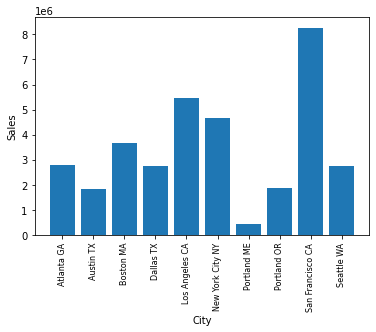

In [66]:
plt.bar(each_city_sales.index, each_city_sales['Sales'])
plt.xticks(each_city_sales.index, rotation='vertical', size=8)
plt.xlabel('City')
plt.ylabel('Sales')

### Question3: Which city has most sales in each month?

In [70]:
each_month_city_sales = sales_data.groupby(['Month', 'City']).sum()

each_month_city_sales

Quantity Ordered  Price Each       Sales
Month City                                                      
1     Atlanta GA                     876   148523.69   149159.54
      Austin TX                      582    87663.19    88087.06
      Boston MA                     1174   200239.58   201088.49
      Dallas TX                      878   142873.48   143462.51
      Los Angeles CA                1716   286754.48   288601.90
...                                  ...         ...         ...
12    New York City NY              3816   643612.89   646770.83
      Portland ME                    352    51769.22    51966.07
      Portland OR                   1506   250793.77   251748.04
      San Francisco CA              6787  1100501.11  1106601.27
      Seattle WA                    2203   386152.70   387317.93

[120 rows x 3 columns]

In [117]:
s= each_month_city_sales.loc[(3,)]
s

#each_month_city_sales.loc[each_month_city_sales['Sales'] == s]

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,1384,230134.86,231905.38
Austin TX,952,153671.83,154549.27
Boston MA,1881,298970.37,301023.81
Dallas TX,1349,221205.40,222376.68
Los Angeles CA,2755,427827.95,429929.37
New York City NY,2211,365148.88,367262.20
Portland ME,214,30265.08,30516.29
Portland OR,903,155384.87,156691.72
San Francisco CA,4025,690363.85,693726.96


In [116]:
for each_month in range(1,13):
    max_sale_city=each_month_city_sales.loc[(each_month,)].max()["Sales"]
    max_city = each_month_city_sales.loc[(each_month,)].idxmax()['Sales']
    print(f"{each_month} : {max_sale_city} {max_city}")

1 : 435588.33 San Francisco CA
2 : 547072.34 San Francisco CA
3 : 693726.96 San Francisco CA
4 : 812426.1900000001 San Francisco CA
5 : 776679.49 San Francisco CA
6 : 613173.48 San Francisco CA
7 : 642881.76 San Francisco CA
8 : 538778.1 San Francisco CA
9 : 463595.72000000003 San Francisco CA
10 : 866700.98 San Francisco CA
11 : 764979.29 San Francisco CA
12 : 1106601.27 San Francisco CA
